# Q1

Multiplications needed: $n * m * k$

Additions needed: $n*m*(k-1)$

We multiply the i<sup>th</sup> row of the $n * k$ matrix (containing k elements) with the j<sup>th</sup> column of the $k*m$ matrix(containing m elements) for obtaining a single element of the final matrix. We need to do this for n rows.
So we require k multiplications and k-1 additions to obtain a single element of the final matrix.



# Q2

In [173]:
import numpy as np
import time

n=30
m=20
k=10

mat1=np.random.randint(1,11,size=(n,k))
mat2=np.random.randint(1,11,size=(k,m))

a=np.zeros((n,m))

t1=time.time()
for i in range(n):
  for j in range(m):
    for l in range(k):
      a[i][j]+=mat1[i][l]*mat2[l][j]
t2=time.time()

t3=time.time()
b=np.matmul(mat1,mat2)
t4=time.time()

print("Array equal test: ", np.array_equal(a,b))
print()
print("time for list of lists approach", (t2-t1))
print("time for numpy array approach", (t4-t3))

Array equal test:  True

time for list of lists approach 0.02332782745361328
time for numpy array approach 0.00015091896057128906


Numpy is significantly faster than using the list of lists approach. This is because numpy is written in low-level languages and uses vectorized operations which to perform bulk operations on entire arrays simultaneously. This leads to better performance.

# Q3

The time complexity of this method is $O(n^2)$. The code below implements the method as described in the question.

In [174]:
import numpy as np
import time

n=101
arr=np.random.randint(1,11,size=n)

t1=time.time()
for i in range(n//2+1):
  idx=i
  for j in range(i+1,n):
    if arr[j]<arr[idx]:
      idx=j
  arr[idx],arr[i]=arr[i],arr[idx]

print("Median is: ", arr[n//2] if n % 2 != 0 else (arr[n//2 - 1] + arr[n//2]) / 2)

t2=time.time()

print("Time taken: ",(t2-t1))

Median is:  5
Time taken:  0.005884885787963867


A better method is to sort the array and then find out the median. This method has a time complexity of $O(n*log(n))$.

In [175]:
t1=time.time()
arr.sort()
print("Median is: ", arr[n//2] if n % 2 != 0 else (arr[n//2 - 1] + arr[n//2]) / 2)
t2=time.time()

print("Time taken: ",(t2-t1))

Median is:  5
Time taken:  0.0016543865203857422


Using numpy.median()

In [176]:
t1=time.time()

print("Median is: ", np.median(arr))
t2=time.time()

print("Time taken: ",(t2-t1))

Median is:  5.0
Time taken:  0.0018415451049804688


Time taken by numpy is significantly lesser.

# Q4

w.r.t. - with respect to

Partial derivative of the function w.r.t. x:
$$
\frac{\partial f}{\partial x} = 2xy + y^3cos(x)
$$

Partial derivative of the function w.r.t. y:

$$
\frac{\partial f}{\partial y} = x^2 + 3y^2sin(x)
$$




# Q5

In [177]:
from jax import grad
import jax.numpy as jnp
import numpy as np

def fn(x,y):
  return x**2*y + y**3*jnp.sin(x)

jax_grad=grad(fn,argnums=[0,1])
grad_x,grad_y=jax_grad(1.0,1.0)

def check_grad(x,y):
  grad_x = 2*x*y + y**3*np.cos(x)
  grad_y = x**2 + 3*y**2*np.sin(x)
  return grad_x, grad_y

print("Comparing Gradients Computed by JAX and Analytical Methods:")
print()
print(f"Gradient with respect to x:")
print(f"  JAX Computed:    {grad_x:.6f}")
print(f"  Analytical:      {check_grad(1.0,1.0)[0]:.6f}")
print()
print(f"Gradient with respect to y:")
print(f"  JAX Computed:    {grad_y:.6f}")
print(f"  Analytical:      {check_grad(1.0,1.0)[1]:.6f}")


Comparing Gradients Computed by JAX and Analytical Methods:

Gradient with respect to x:
  JAX Computed:    2.540302
  Analytical:      2.540302

Gradient with respect to y:
  JAX Computed:    3.524413
  Analytical:      3.524413


Checking for some more random values:

In [178]:
def compare_gradients(x_val, y_val):

    grad_x, grad_y = jax_grad(x_val, y_val)


    grad_x_analytical, grad_y_analytical = check_grad(x_val, y_val)


    print(f"Test Case: x = {x_val}, y = {y_val}")
    print()
    print(f"Gradient with respect to x:")
    print(f"  JAX Computed:    {grad_x:.6f}")
    print(f"  Analytical:      {grad_x_analytical:.6f}")
    print()
    print(f"Gradient with respect to y:")
    print(f"  JAX Computed:    {grad_y:.6f}")
    print(f"  Analytical:      {grad_y_analytical:.6f}")
    print("\n")

np.random.seed(42)
random_test_values = np.random.rand(3, 2) * 10

print("Random Test Cases:")
print()

for x_val, y_val in random_test_values:
    compare_gradients(x_val, y_val)


Random Test Cases:

Test Case: x = 3.745401188473625, y = 9.50714306409916

Gradient with respect to x:
  JAX Computed:    -636.150330
  Analytical:      -636.150327

Gradient with respect to y:
  JAX Computed:    -139.930099
  Analytical:      -139.930124


Test Case: x = 7.319939418114051, y = 5.986584841970366

Gradient with respect to x:
  JAX Computed:    196.854645
  Analytical:      196.854682

Gradient with respect to y:
  JAX Computed:    146.127991
  Analytical:      146.127987


Test Case: x = 1.5601864044243652, y = 1.5599452033620265

Gradient with respect to x:
  JAX Computed:    4.907885
  Analytical:      4.907885

Gradient with respect to y:
  JAX Computed:    9.734058
  Analytical:      9.734058




# Q6

In [179]:
import sympy as sp
def fn(x, y):
  return x**2*y + y**3*sp.sin(x)

x,y=sp.symbols('x y')

grad_x=sp.diff(fn(x,y),x)
grad_y=sp.diff(fn(x,y),y)

print(f"Gradient with respect to x: ",grad_x)
print(f"Gradient with respect to y: ",grad_y)

Gradient with respect to x:  2*x*y + y**3*cos(x)
Gradient with respect to y:  x**2 + 3*y**2*sin(x)


# Q7

In [180]:
dict={
    2022: {
        'Branch 1': {
            'Roll Number': 1,
            'Name': 'N',
            'Marks': {
                'Maths': 100,
                'English': 70
            }
        },
        'Branch 2': {}
    },
    2023: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2024: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2025: {
        'Branch 1': {},
        'Branch 2': {}
    }
}


In [181]:
dict[2022]["Branch 1"]["Name"]

'N'

# Q8

In [182]:
class Student:
    def __init__(self, name, roll):
        self.name = name
        self.roll = roll
        self.marks = {}

    def add_marks(self,subject,marks):
        self.marks[subject] = marks

class Branch:
    def __init__(self):
        self.students = []

    def add_student(self,name):
        self.students.append(name)

class Year:
    def __init__(self):
        self.years = []

    def add_branch(self,branch):
        self.years.append(branch)

year2022 = Year()
branch1_22 = Branch()
Student1_b1_22 = Student("N",1)
Student1_b1_22.add_marks("Maths",100)
Student1_b1_22.add_marks("English",70)
branch1_22.add_student(Student1_b1_22)
year2022.add_branch(branch1_22)

branch2_22 = Branch()
year2022.add_branch(branch2_22)

year2023 = Year()
branch1_23 = Branch()
year2023.add_branch(branch1_23)
branch2_23 = Branch()
year2023.add_branch(branch2_23)

year2024 = Year()
branch1_24 = Branch()
year2024.add_branch(branch1_24)
branch2_24 = Branch()
year2024.add_branch(branch2_24)


year2025 = Year()
branch1_25 = Branch()
year2025.add_branch(branch1_25)
branch2_25 = Branch()
year2025.add_branch(branch2_25)

database = [year2022, year2023, year2024, year2025]

print(database[0].years[0].students[0].name)

N


# Q9

In [183]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

### 1.

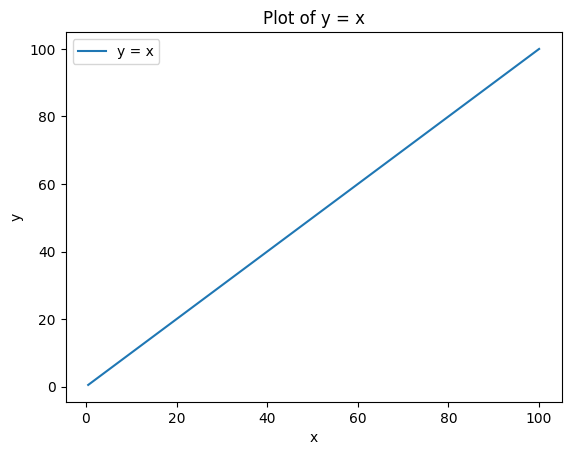

In [184]:
y = x

plt.figure()
plt.plot(x, y, label='y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')
plt.legend()
plt.show()

### 2.

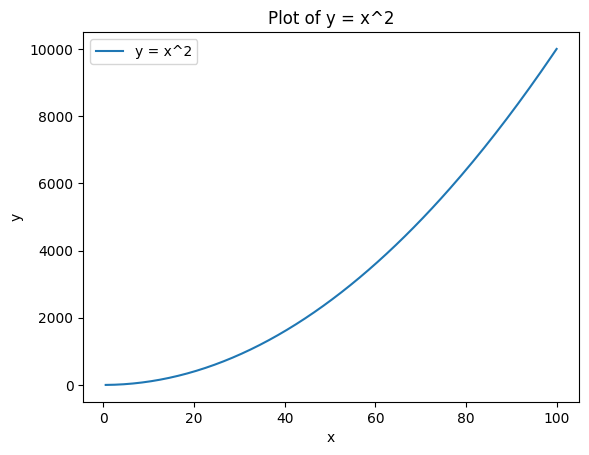

In [185]:
y = x**2

plt.figure()
plt.plot(x, y, label='y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^2')
plt.legend()
plt.show()

### 3.

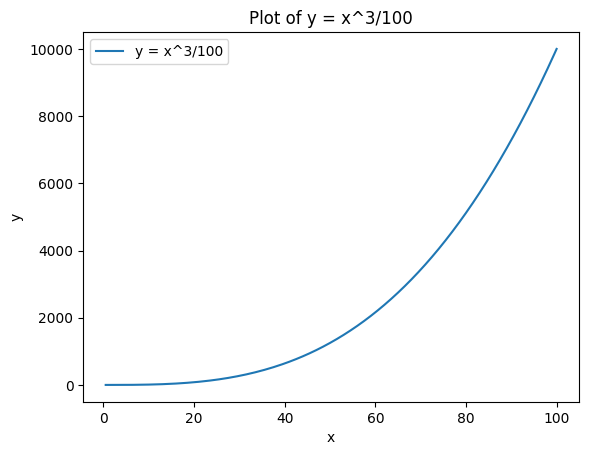

In [186]:
y = x**3/100

plt.figure()
plt.plot(x, y, label='y = x^3/100')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^3/100')
plt.legend()
plt.show()

### 4.

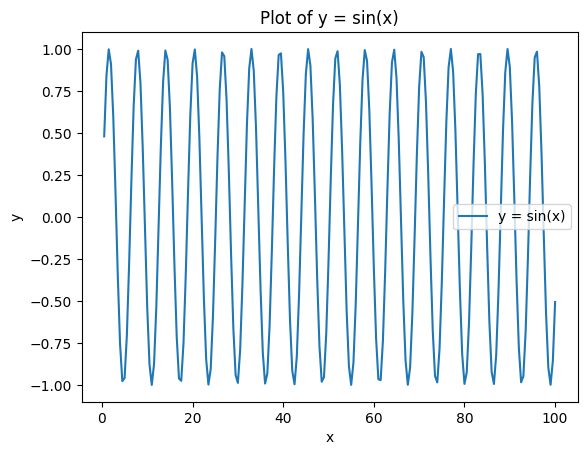

In [187]:
y = np.sin(x)

plt.figure()
plt.plot(x, y, label='y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)')
plt.legend()
plt.show()

### 5.

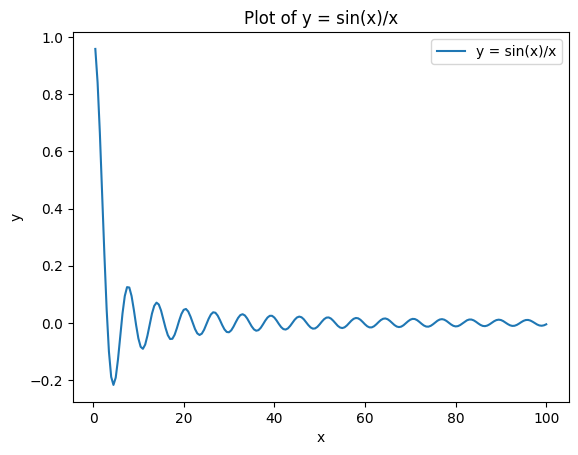

In [188]:
y = np.sin(x)/x

plt.figure()
plt.plot(x, y, label='y = sin(x)/x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)/x')
plt.legend()
plt.show()

### 6.

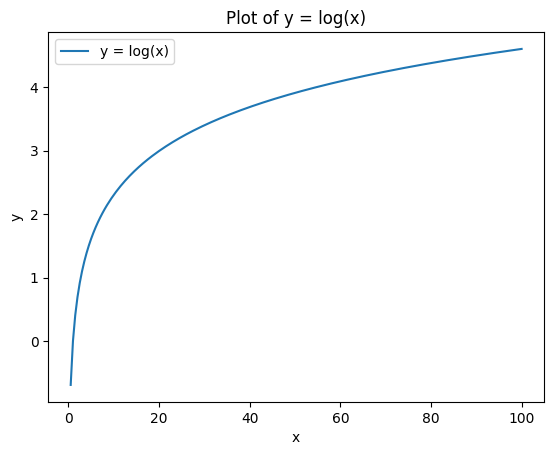

In [189]:
y = np.log(x)

plt.figure()
plt.plot(x, y, label='y = log(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = log(x)')
plt.legend()
plt.show()

### 7.

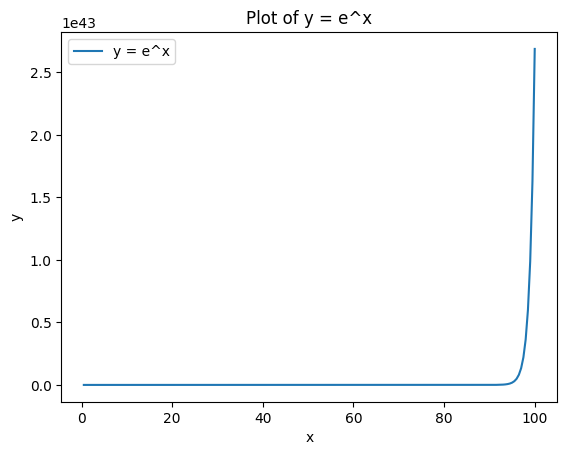

In [190]:
y = np.exp(x)

plt.figure()
plt.plot(x, y, label='y = e^x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = e^x')
plt.legend()
plt.show()

# Q10

In [191]:
import numpy as np
import pandas as pd

arr = np.random.uniform(1,2,size=(20,5))

df = pd.DataFrame(arr)
df.columns=["a","b","c","d","e"]

print(df)

           a         b         c         d         e
0   1.058084  1.866176  1.601115  1.708073  1.020584
1   1.969910  1.832443  1.212339  1.181825  1.183405
2   1.304242  1.524756  1.431945  1.291229  1.611853
3   1.139494  1.292145  1.366362  1.456070  1.785176
4   1.199674  1.514234  1.592415  1.046450  1.607545
5   1.170524  1.065052  1.948886  1.965632  1.808397
6   1.304614  1.097672  1.684233  1.440152  1.122038
7   1.495177  1.034389  1.909320  1.258780  1.662522
8   1.311711  1.520068  1.546710  1.184854  1.969585
9   1.775133  1.939499  1.894827  1.597900  1.921874
10  1.088493  1.195983  1.045227  1.325330  1.388677
11  1.271349  1.828738  1.356753  1.280935  1.542696
12  1.140924  1.802197  1.074551  1.986887  1.772245
13  1.198716  1.005522  1.815461  1.706857  1.729007
14  1.771270  1.074045  1.358466  1.115869  1.863103
15  1.623298  1.330898  1.063558  1.310982  1.325183
16  1.729606  1.637557  1.887213  1.472215  1.119594
17  1.713245  1.760785  1.561277  1.770967  1.

In [192]:
print("Standard deviation of all columns\n",df.std())
print("\nMaximum standard deviation among all columns:",df.std().idxmax())


Standard deviation of all columns
 a    0.276808
b    0.314495
c    0.306230
d    0.297347
e    0.310052
dtype: float64

Maximum standard deviation among all columns: b


In [193]:
print("Mean of all rows:\n",df.mean(axis=1))
print("\nLowest mean is in row:",df.mean(axis=1).idxmax())

Mean of all rows:
 0     1.450806
1     1.475984
2     1.432805
3     1.407849
4     1.392064
5     1.591698
6     1.329742
7     1.472038
8     1.506586
9     1.825847
10    1.208742
11    1.456094
12    1.555361
13    1.491113
14    1.436551
15    1.330784
16    1.569237
17    1.660014
18    1.223003
19    1.523239
dtype: float64

Lowest mean is in row: 9


#Q11

In [194]:
df['f']=df.sum(axis=1)
df

,a,b,c,d,e,f
0,1.058084,1.866176,1.601115,1.708073,1.020584,7.254032
1,1.969910,1.832443,1.212339,1.181825,1.183405,7.379921
2,1.304242,1.524756,1.431945,1.291229,1.611853,7.164026
3,1.139494,1.292145,1.366362,1.456070,1.785176,7.039246
4,1.199674,1.514234,1.592415,1.046450,1.607545,6.960318
5,1.170524,1.065052,1.948886,1.965632,1.808397,7.958491
6,1.304614,1.097672,1.684233,1.440152,1.122038,6.648710
7,1.495177,1.034389,1.909320,1.258780,1.662522,7.360188
8,1.311711,1.520068,1.546710,1.184854,1.969585,7.532928
9,1.775133,1.939499,1.894827,1.597900,1.921874,9.129233


In [195]:
df.loc[df['f']>=8,'g']='GT8'
df.loc[df['f']<8,'g']='LT8'
df

,a,b,c,d,e,f,g
0,1.058084,1.866176,1.601115,1.708073,1.020584,7.254032,LT8
1,1.969910,1.832443,1.212339,1.181825,1.183405,7.379921,LT8
2,1.304242,1.524756,1.431945,1.291229,1.611853,7.164026,LT8
3,1.139494,1.292145,1.366362,1.456070,1.785176,7.039246,LT8
4,1.199674,1.514234,1.592415,1.046450,1.607545,6.960318,LT8
5,1.170524,1.065052,1.948886,1.965632,1.808397,7.958491,LT8
6,1.304614,1.097672,1.684233,1.440152,1.122038,6.648710,LT8
7,1.495177,1.034389,1.909320,1.258780,1.662522,7.360188,LT8
8,1.311711,1.520068,1.546710,1.184854,1.969585,7.532928,LT8
9,1.775133,1.939499,1.894827,1.597900,1.921874,9.129233,GT8


In [196]:
sd_L = df.loc[df['g'] == 'LT8', 'f'].std()
sd_G = df.loc[df['g'] == 'GT8', 'f'].std()

print("Standard deviation in row for LT8:",sd_L)
print("Standard deviation in row for GT8:",sd_G)

Standard deviation in row for LT8: 0.5389241212121814
Standard deviation in row for GT8: 0.5863071473218319


#Q12

In [197]:
a1=np.array([[1,2,3],[4,5,6]])
a1

array([[1, 2, 3],
       [4, 5, 6]])

In [198]:
a2=np.array([10,20,30])
a2

array([10, 20, 30])

In [199]:
a1+a2

array([[11, 22, 33],
       [14, 25, 36]])

# Q13

In [200]:
def arg_min(arr):
    min_idx = 0
    min_val = arr[0]

    for i in range(1, len(arr)):
        if arr[i] < min_val:
            min_val = arr[i]
            min_idx = i

    return min_idx

In [201]:
arr = np.random.randint(0,10,20)
arr

array([3, 6, 2, 5, 1, 9, 8, 4, 5, 3, 9, 6, 8, 6, 0, 0, 8, 8, 3, 8])

In [202]:
arg_min(arr)

14

In [203]:
np.argmin(arr)

14